In [1]:
"""Filter viewer

Shows impulse response, step response, and frequency response of the
gaussian FIRs used for downconversion. First set of plots is for the
pingerd filter, second is for hydrocomms.
"""

import sys

%matplotlib notebook
from matplotlib import pyplot

try:
    import cupy as xp
    print('Using CuPy\n')
except ImportError:
    import numpy as xp
import numpy as np

sys.path.insert(0, '../modules')
from hydrocode.modules.common import convert, filt
import common.const
import pinger.const
import comms.const

FIR Rise Time: 113


<IPython.core.display.Javascript object>


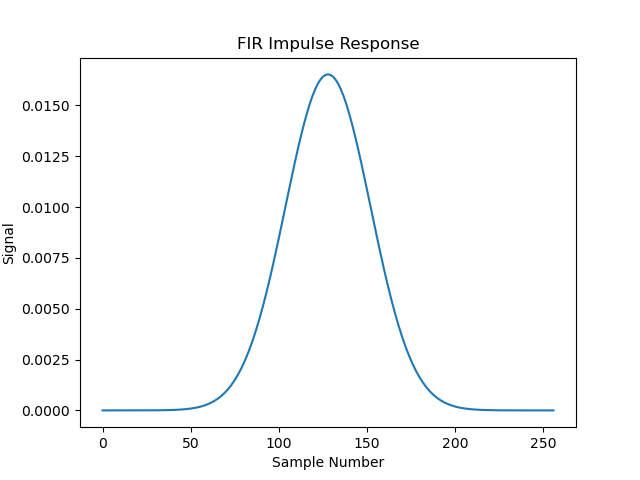

<IPython.core.display.Javascript object>


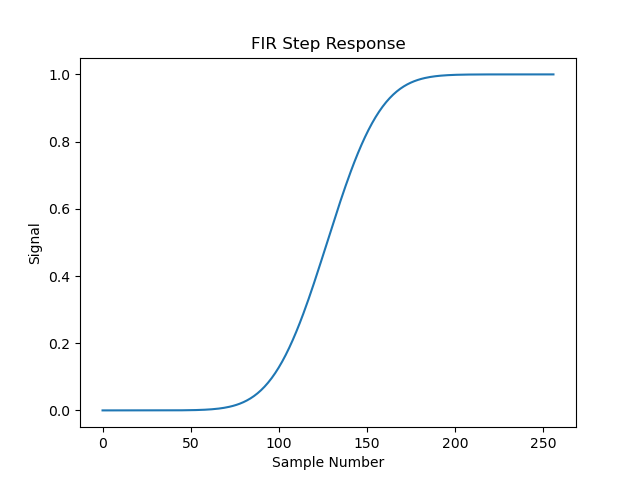

<IPython.core.display.Javascript object>


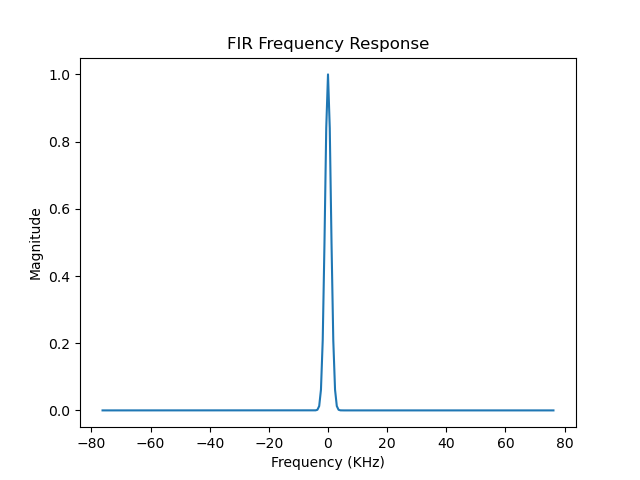

In [2]:
h = filt.firgauss(
    convert.omega_hat(pinger.const.STOPBAND), pinger.const.FIR_ORDER)

H = xp.fft.fftshift(xp.fft.fft(h))
H_mag = xp.abs(H)

# Matplotlib doesn't work with CuPy arrays
if hasattr(xp, 'as_numpy'):
    h = xp.as_numpy(h)
    H_mag = xp.as_numpy(H_mag)

N = len(H)
freqs = np.linspace(
    -(N // 2), (N - 1) // 2, num=N) / N * common.const.SAMPLE_RATE / 1000

fir_rise_time = filt.gauss_rise_time(h)
print('FIR Rise Time: ' + str(fir_rise_time))

pyplot.figure()
pyplot.plot(h)
pyplot.title('FIR Impulse Response')
pyplot.xlabel('Sample Number')
pyplot.ylabel('Signal')

pyplot.figure()
pyplot.plot(h.cumsum())
pyplot.title('FIR Step Response')
pyplot.xlabel('Sample Number')
pyplot.ylabel('Signal')
    
pyplot.figure()
pyplot.plot(freqs, H_mag)
pyplot.title('FIR Frequency Response')
pyplot.xlabel('Frequency (KHz)')
pyplot.ylabel('Magnitude')

pyplot.show()

<IPython.core.display.Javascript object>


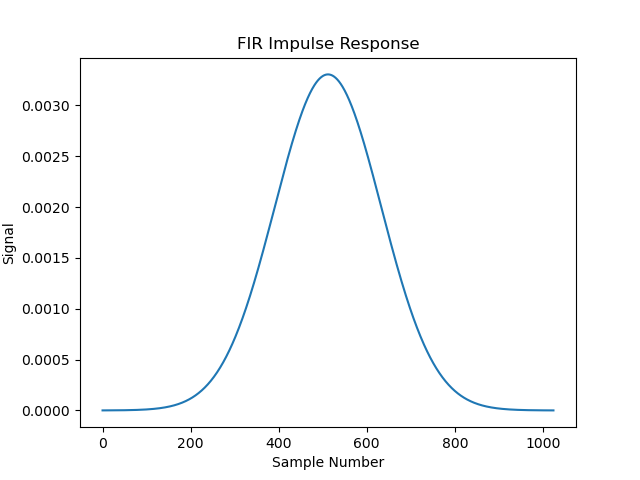

<IPython.core.display.Javascript object>


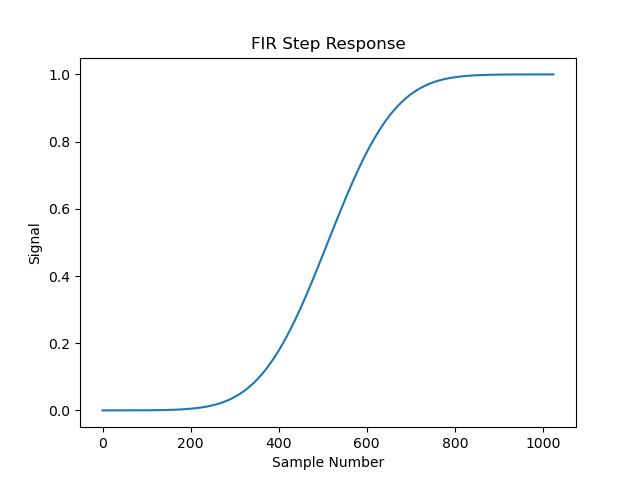

<IPython.core.display.Javascript object>


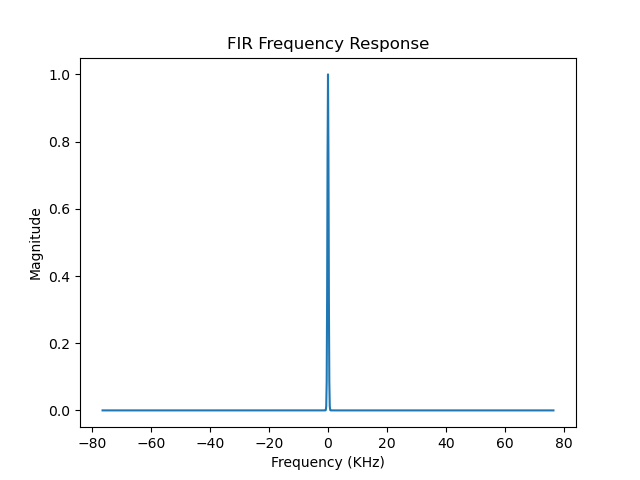

In [3]:
num_symbols = 2 ** comms.const.SYMBOL_SIZE
symbol_spacing = comms.const.BANDWIDTH / (num_symbols - 1)
symbol_stopband = comms.const.SYMBOL_STOPBAND_FRAC * 2 * symbol_spacing

h = filt.firgauss(convert.omega_hat(symbol_stopband), 1024)

H = xp.fft.fftshift(xp.fft.fft(h))
H_mag = xp.abs(H)

# Matplotlib doesn't work with CuPy arrays
if hasattr(xp, 'as_numpy'):
    h = xp.as_numpy(h)
    H_mag = xp.as_numpy(H_mag)

N = len(H)
freqs = np.linspace(
    -(N // 2), (N - 1) // 2, num=N) / N * common.const.SAMPLE_RATE / 1000

pyplot.figure()
pyplot.plot(h)
pyplot.title('FIR Impulse Response')
pyplot.xlabel('Sample Number')
pyplot.ylabel('Signal')

pyplot.figure()
pyplot.plot(h.cumsum())
pyplot.title('FIR Step Response')
pyplot.xlabel('Sample Number')
pyplot.ylabel('Signal')
    
pyplot.figure()
pyplot.plot(freqs, H_mag)
pyplot.title('FIR Frequency Response')
pyplot.xlabel('Frequency (KHz)')
pyplot.ylabel('Magnitude')

pyplot.show()